In [251]:
#importing all the dependencies
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#supressing the Warnings
import warnings
warnings.filterwarnings("ignore")

Steps:
1. Loading, Analysis and Cleaning Dataset
2. Exploatory Data Analysis
3. Creating Dummy Variables
4. Spliting the data into Train Set and Test Set
5. Scaling
6. Model Building
7. Making Predictions on train data using the final model (Model-3)
8. Model Evaluation (on train data)
9. Making predictions on the test set
10. Model Evaluation (on test data)
11. Calculating Lead score, Identifying Hot leads and Feature Importance
12. Most impactful variables i.e., Variables with the largest coefficients (in absolute value)
13. Recommendation

## 1. Loading, Analysis and Cleaning Dataset

##### 1.1 Loading Data into lead dataset.

In [252]:
#Loading data into lead dataset using pandas
lead = pd.read_csv("/kaggle/input/leads-csv-file/Leads.csv")

In [253]:
#Validating the data of lead dataset
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### 1.2 Analysing the lead data frame.

In [254]:
#Checking the information of the columns in the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [255]:
# Checking the total number of rows and columns of the dataset
lead.shape

(9240, 37)

In [256]:
#verifying the numeric values of the dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### 1.3 Cleaning the data of lead dataset

###### We have seen many fields have the Select values which is equivalent to null. So, we will replace Select with NaN in the entire lead dataset.

In [257]:
#Relpacing Select values with NaN
lead = lead.replace('Select', np.nan)

In [258]:
#Checking the columns for Null Values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [259]:
#Finding the null percentage accross columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

###### 
###### We can see there are columns which have more than 40% null values. We can drop those columns.
###### 

In [260]:
#dropping the columns with missing values more than 40%
lead = lead.drop(columns = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
                            'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [261]:
#Finding Null percentage after removing the columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

##### The 'Country' column has 27% missing values. Plotting a count plot of the column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

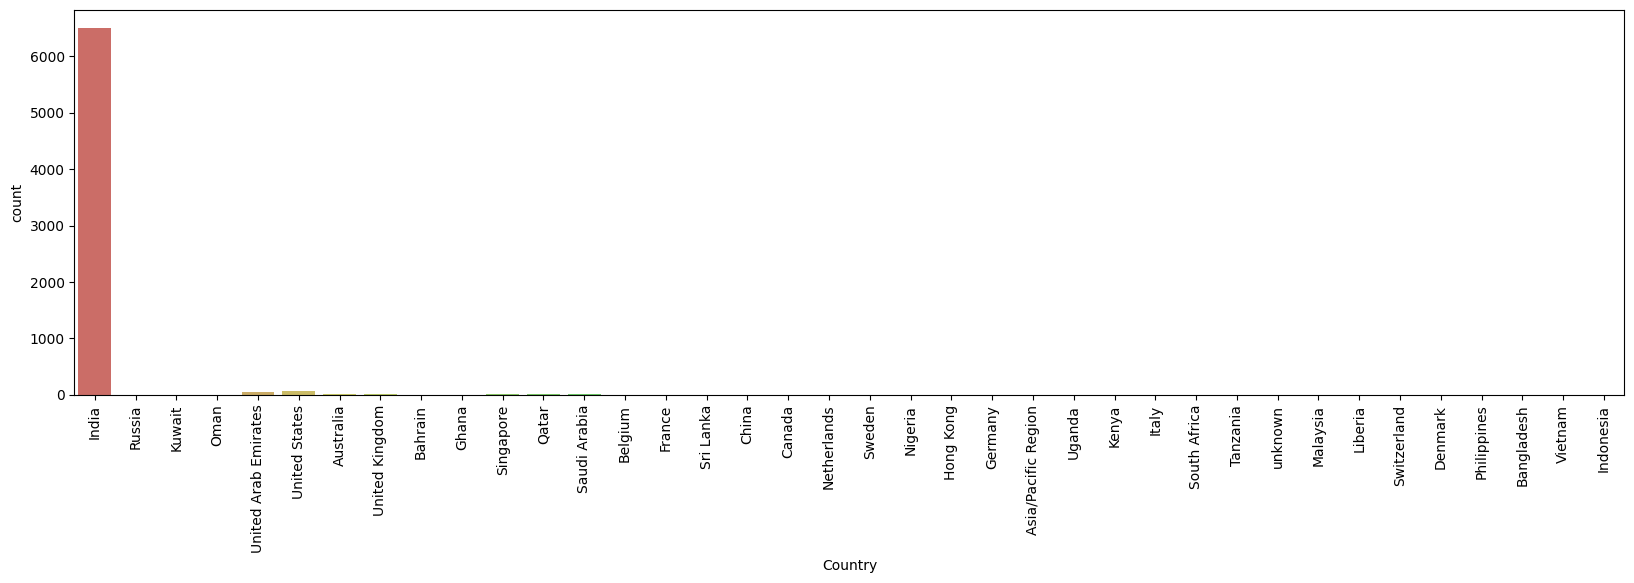

In [262]:
#Plotting count plot for 'Country' column
plt.figure(figsize = (20,5))
sns.countplot(x = 'Country', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### By looking at the above plot we can say this column is highly skewed. But as the column is important for analysis we can't drop it from the table. We will impute the null values of this column with value 'India'

In [263]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

##### The Specialization column has 37% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

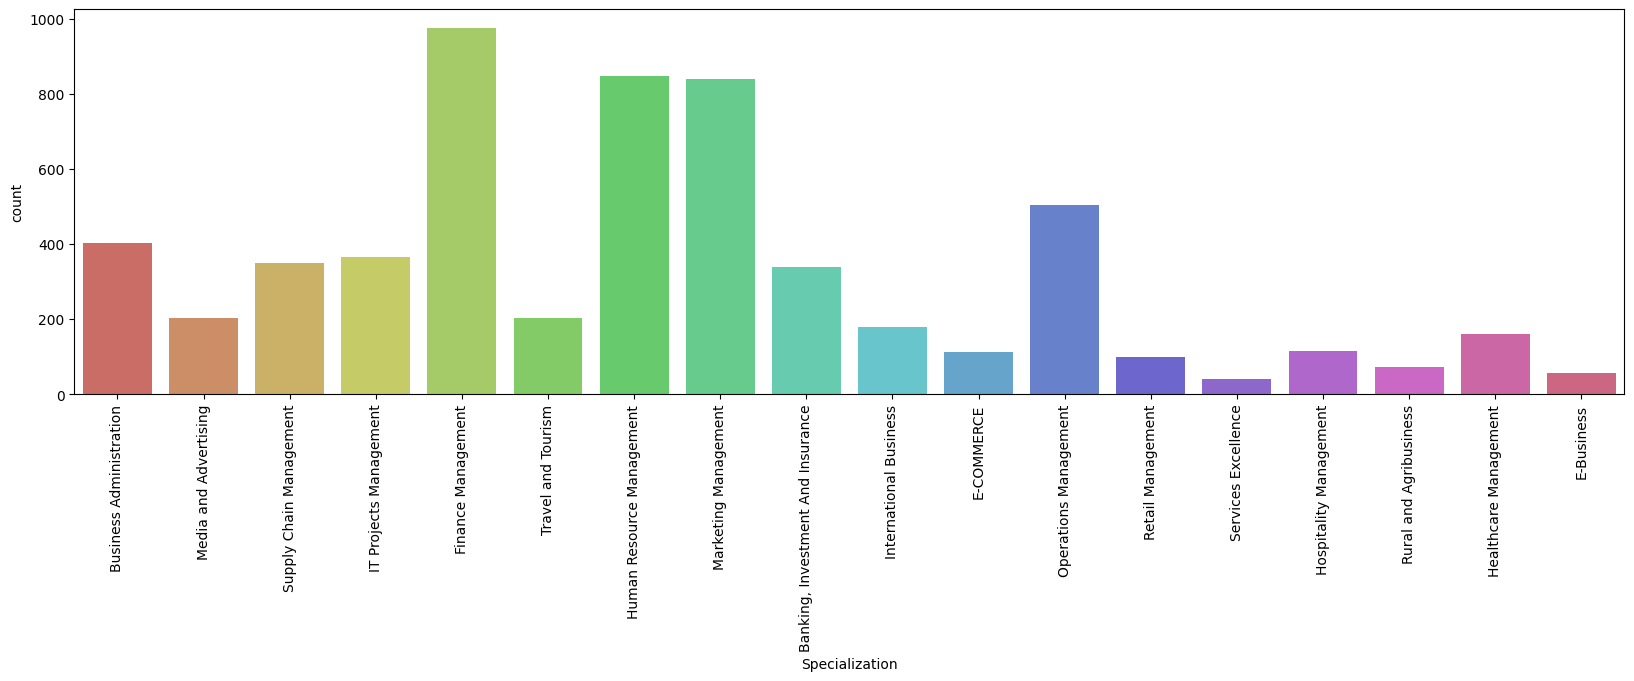

In [264]:
#Plotting countplot with Specialisation
plt.figure(figsize=(20,5))
sns.countplot(x = 'Specialization', data = lead, palette="hls")
plt.xticks(rotation = 90)

##### As 37% of values are missing from the Specialization column, It is possible that for many Specialization it might be blank.
##### So creating a new category 'Others' for this value

In [265]:
#Creating an Other category for Null values.
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

##### The Column 'What is your current occupation' have 29% missing values. Plotting count plot of this column.'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

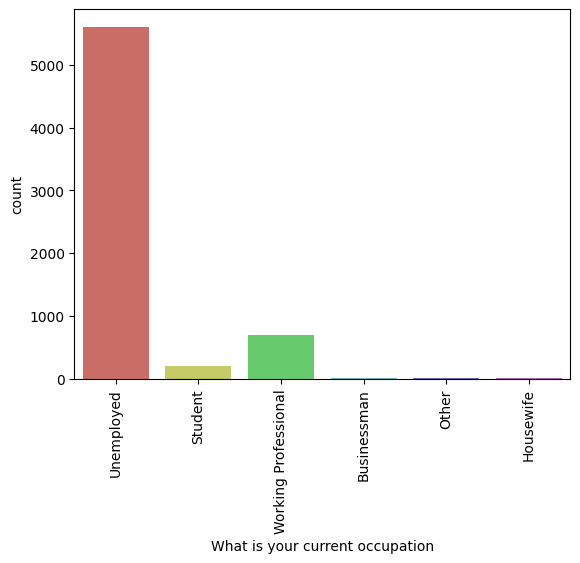

In [266]:
#ploting count plot for 'What is your current occupation' column
sns.countplot(x = 'What is your current occupation', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### By looking at the above graph we can say that most of the values are 'Unemployed'. We can impute missing values in this column with this value.

In [267]:
#Replacing null values with 'Unemployeed' in the 'What is your current occupation' column
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

##### The column 'What matters most to you in choosing a course', this column has 29% missing values
##### Ploting the countplot for this column

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

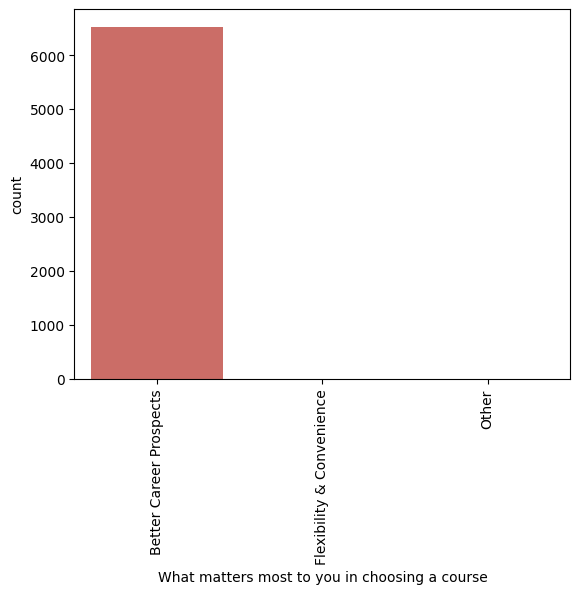

In [268]:
# Ploting countplot for 'What matters most to you in choosing a course' column
sns.countplot(x = 'What matters most to you in choosing a course', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

#### Another column Tag is having 36% Null values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

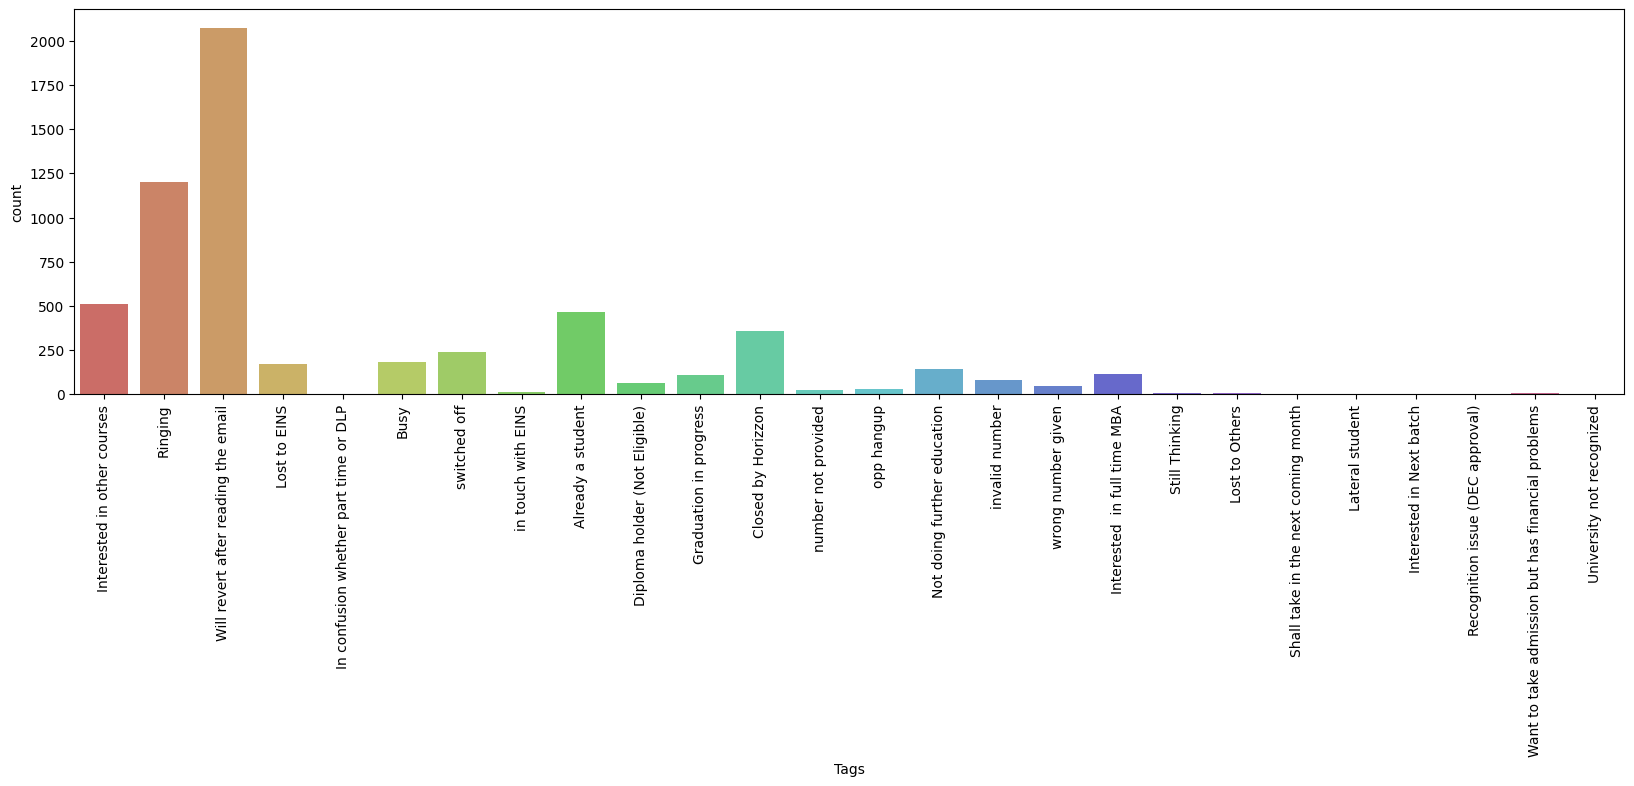

In [269]:
#Plotting count plot for this column.
plt.figure(figsize = (20,5))
sns.countplot(x = 'Tags', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### Based on the plot above we can see, most of the values are 'will revert after reading the email' so we can impute the Null values with this.

In [270]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [271]:
#By looking at the above graph we can see the column is highly skewed so will remove this column.
lead = lead.drop('What matters most to you in choosing a course', axis = 1)

##### The Column 'City' have 40% missing values, plottin a count plot for this column.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

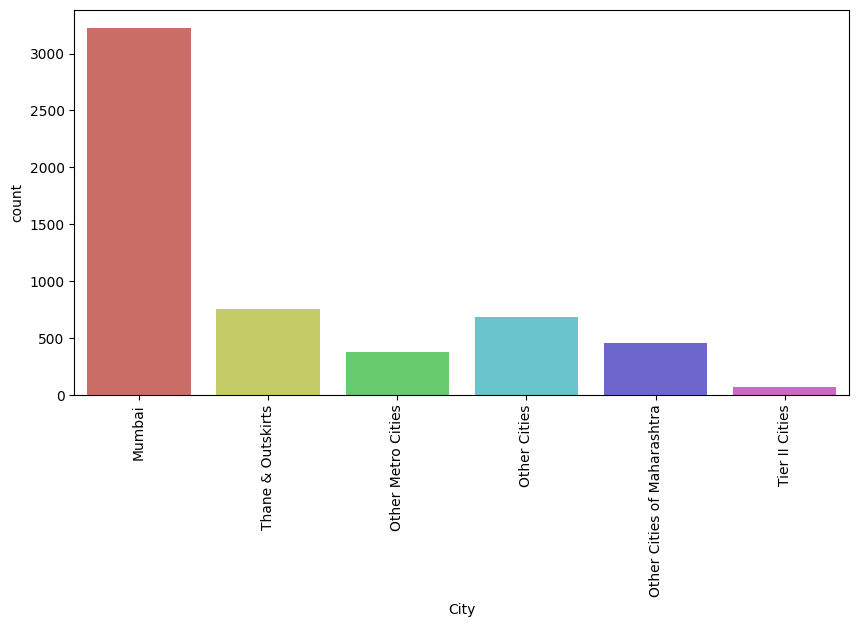

In [272]:
#Plotting a count plot on 'City' column
plt.figure(figsize=(10,5))
sns.countplot(x = 'City', data = lead, palette = 'hls')
plt.xticks(rotation = 90)

##### From the above plot we can see that most values are of "Mumbai", so we can impute the null values with 'Mumbai'.

In [273]:
#Replaccing Null values of city column with Mumbai.
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [274]:
#Finding the Null percentage after treating the columns.
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### There are columns (TotalVisits, Page Views Per Visit, Last Activity) which have 1% null values so will drop the rows with null values.

In [275]:
# Dropping the rows with null values.
lead.dropna(inplace = True)

In [276]:
# Finding the Null percentage after dropping the columns and rows
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### Now we can see there is no null values in the columns.

## 2. Exploatory Data Analysis

In [277]:
#Checking for duplicates in the dataset.
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


###### There is no duplicate record in the dataset.

### 2.1 Univariate Analysis

#### 2.1.1 Categorical Variable

<Axes: xlabel='Lead Origin', ylabel='count'>

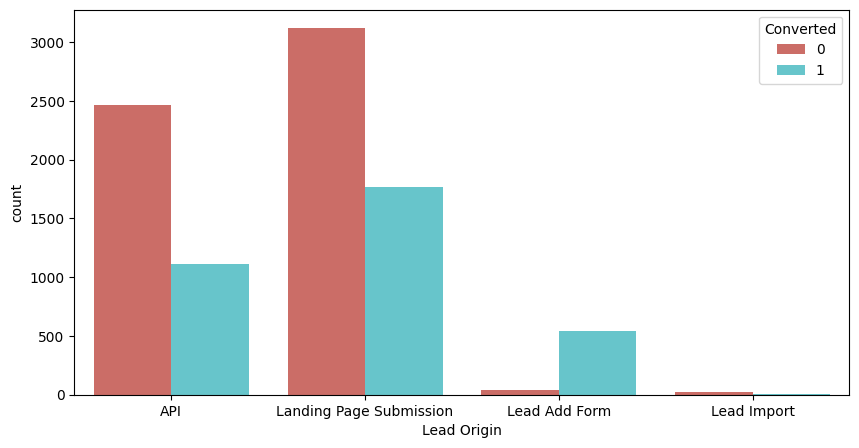

In [278]:
#Ploting for Lead Origin
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Origin', data = lead, hue = 'Converted', palette = 'hls')

##### We need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form in order to improve overall lead conversion rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

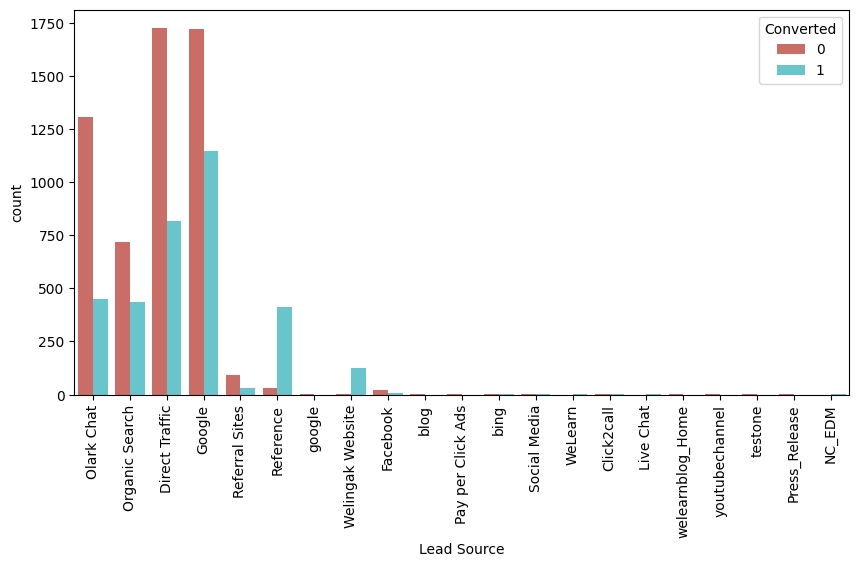

In [279]:
#Ploting for Lead Source
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### Creating a new category 'Others' for the categories which doesn't have much values under Lead Source column.

In [280]:
lead['Lead Source'] = lead['Lead Source'].replace(['blog','Pay per Click Ads', 'bing','Social Media','WeLearn','Click2call','Live Chat'
                                                  ,'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

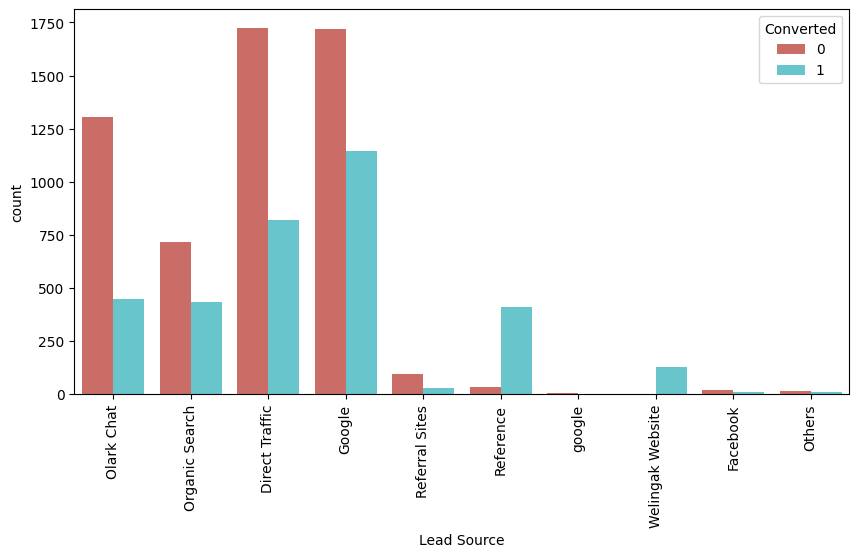

In [281]:
#Plotting the bar again
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### We can see there are two columns with the name 'Google' and 'google'. So replacing the 'google' with 'Google'.

In [282]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

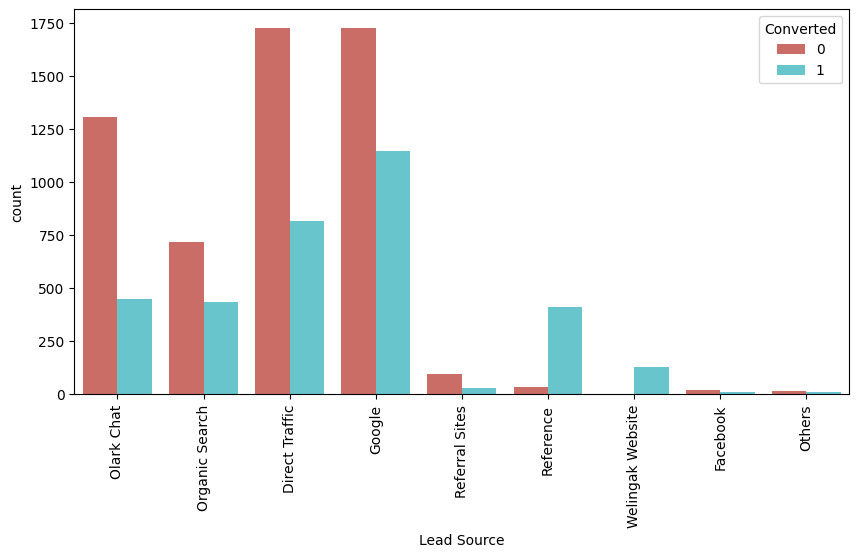

In [283]:
#Plotting the bar again
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

<Axes: xlabel='Do Not Email', ylabel='count'>

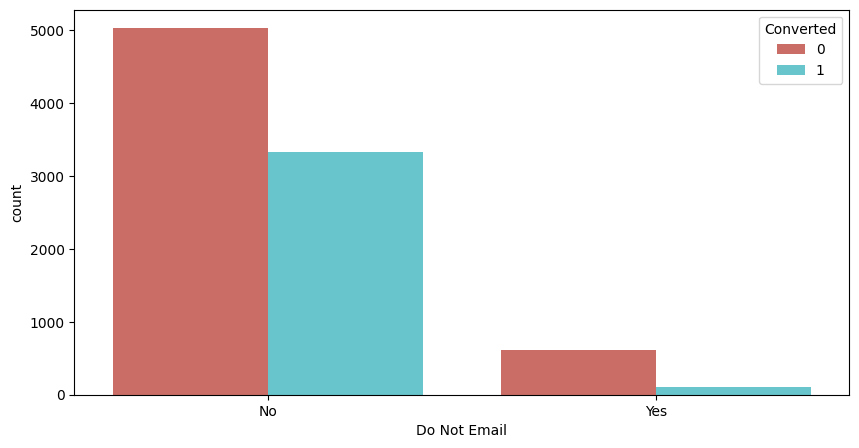

In [284]:
#Ploting the bar to 'Do Not Email'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Do Not Email', data = lead, hue = 'Converted', palette = 'hls')

<Axes: xlabel='Do Not Call', ylabel='count'>

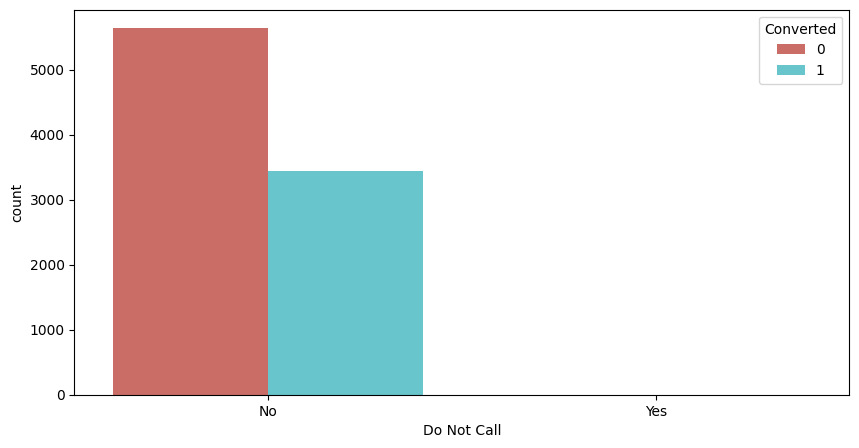

In [285]:
#Ploting the bar to 'Do Not Call'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Do Not Call', data = lead, hue = 'Converted', palette = 'hls')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

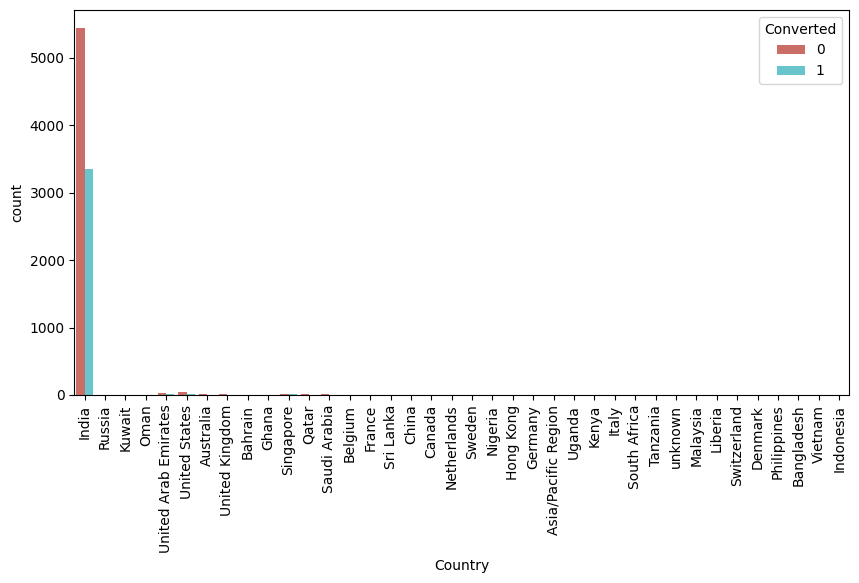

In [286]:
#Ploting the bar to 'Country'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Country', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

###### There are too many countries with very less values. Converging all the other countries as 'Outside India'.

In [287]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)

(array([0, 1]), [Text(0, 0, 'India'), Text(1, 0, 'outside india')])

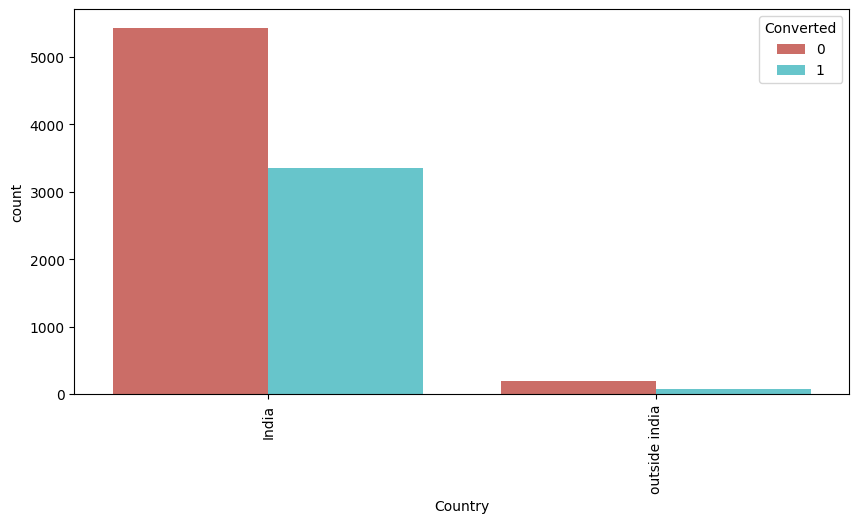

In [288]:
# plotting the graph again:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Country', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)

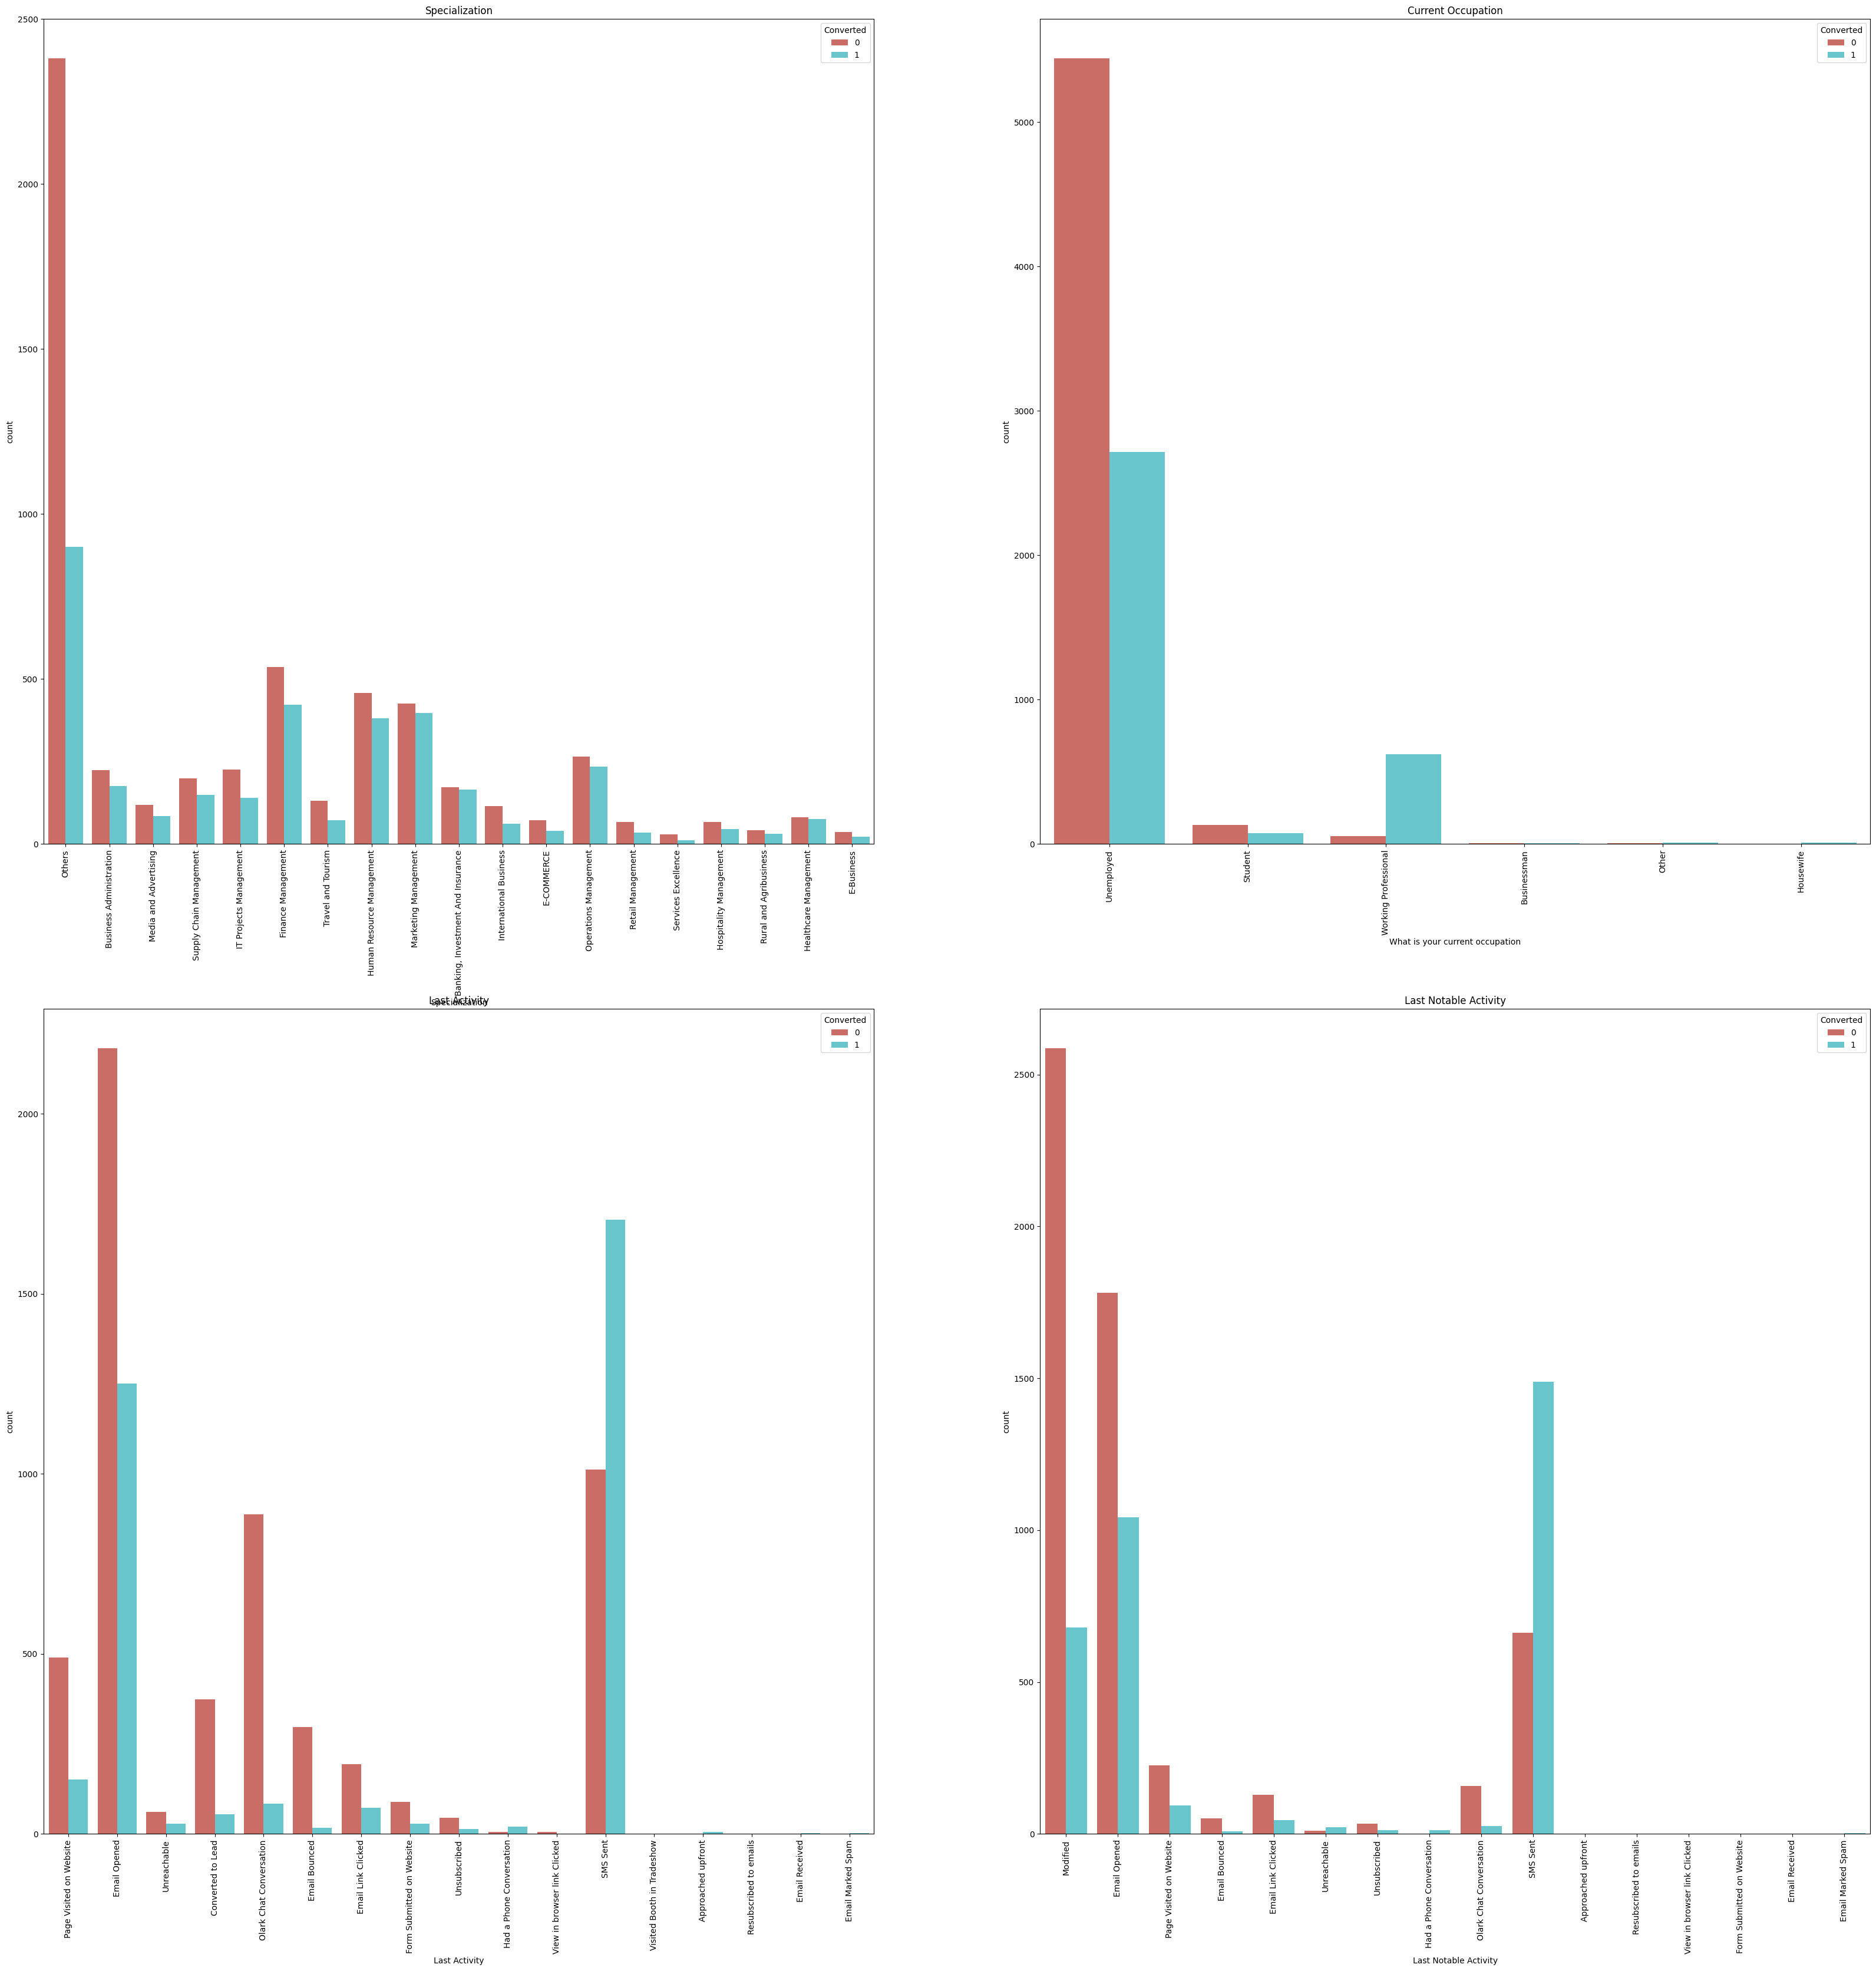

In [289]:
plt.figure(figsize = (40,40))

plt.subplot(2,2,1)
sns.countplot(x = 'Specialization', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(x = 'What is your current occupation', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(x = 'Last Activity', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Last Activity')

plt.subplot(2,2,4)
sns.countplot(x = 'Last Notable Activity', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Last Notable Activity')

plt.show()

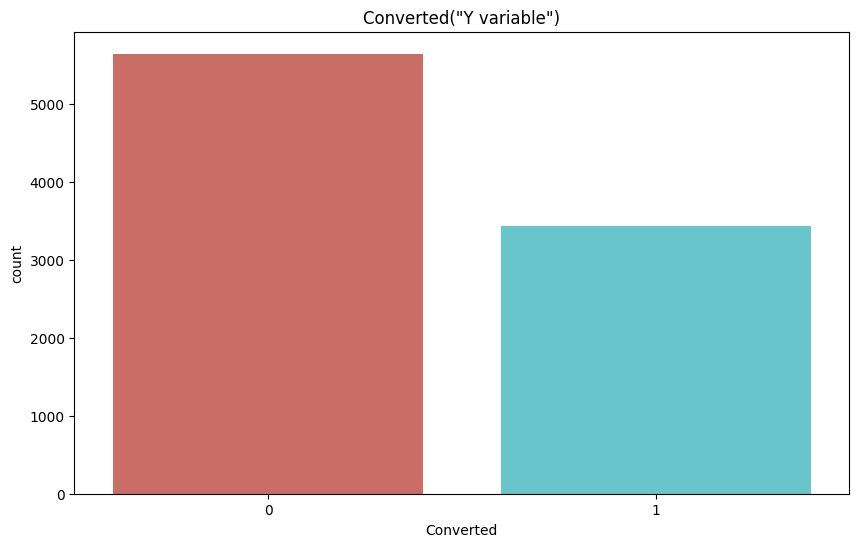

In [290]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Converted', data = lead, palette = 'hls')
plt.title('Converted("Y variable")')
plt.show()

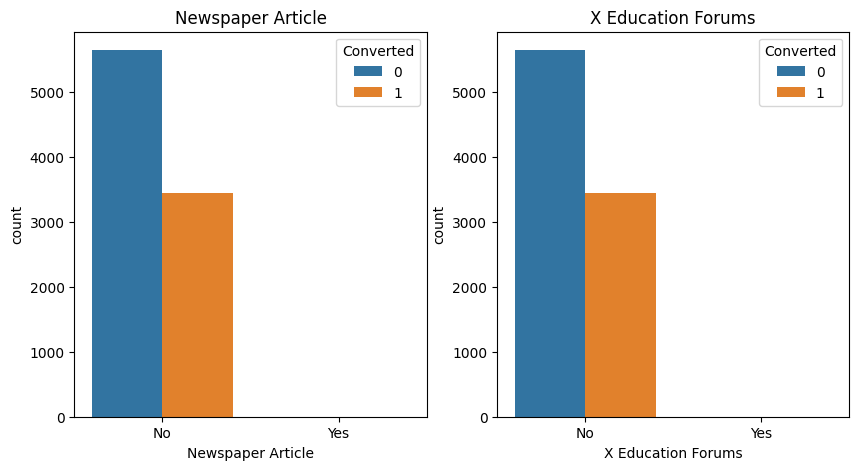

In [291]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Newspaper Article')
plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead).tick_params(axis='x')
plt.title('X Education Forums')
plt.show()

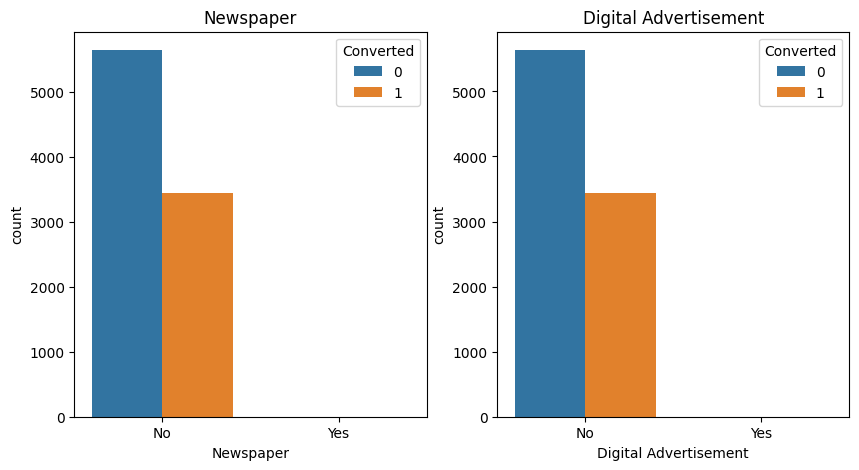

In [292]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Newspaper')
plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Digital Advertisement')
plt.show()

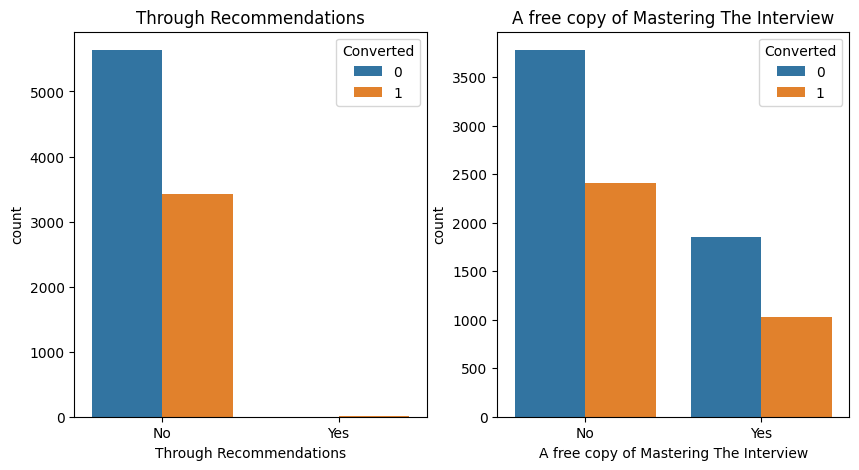

In [293]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead).tick_params(axis='x')
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead).tick_params(axis='x')
plt.title('A free copy of Mastering The Interview')
plt.show()


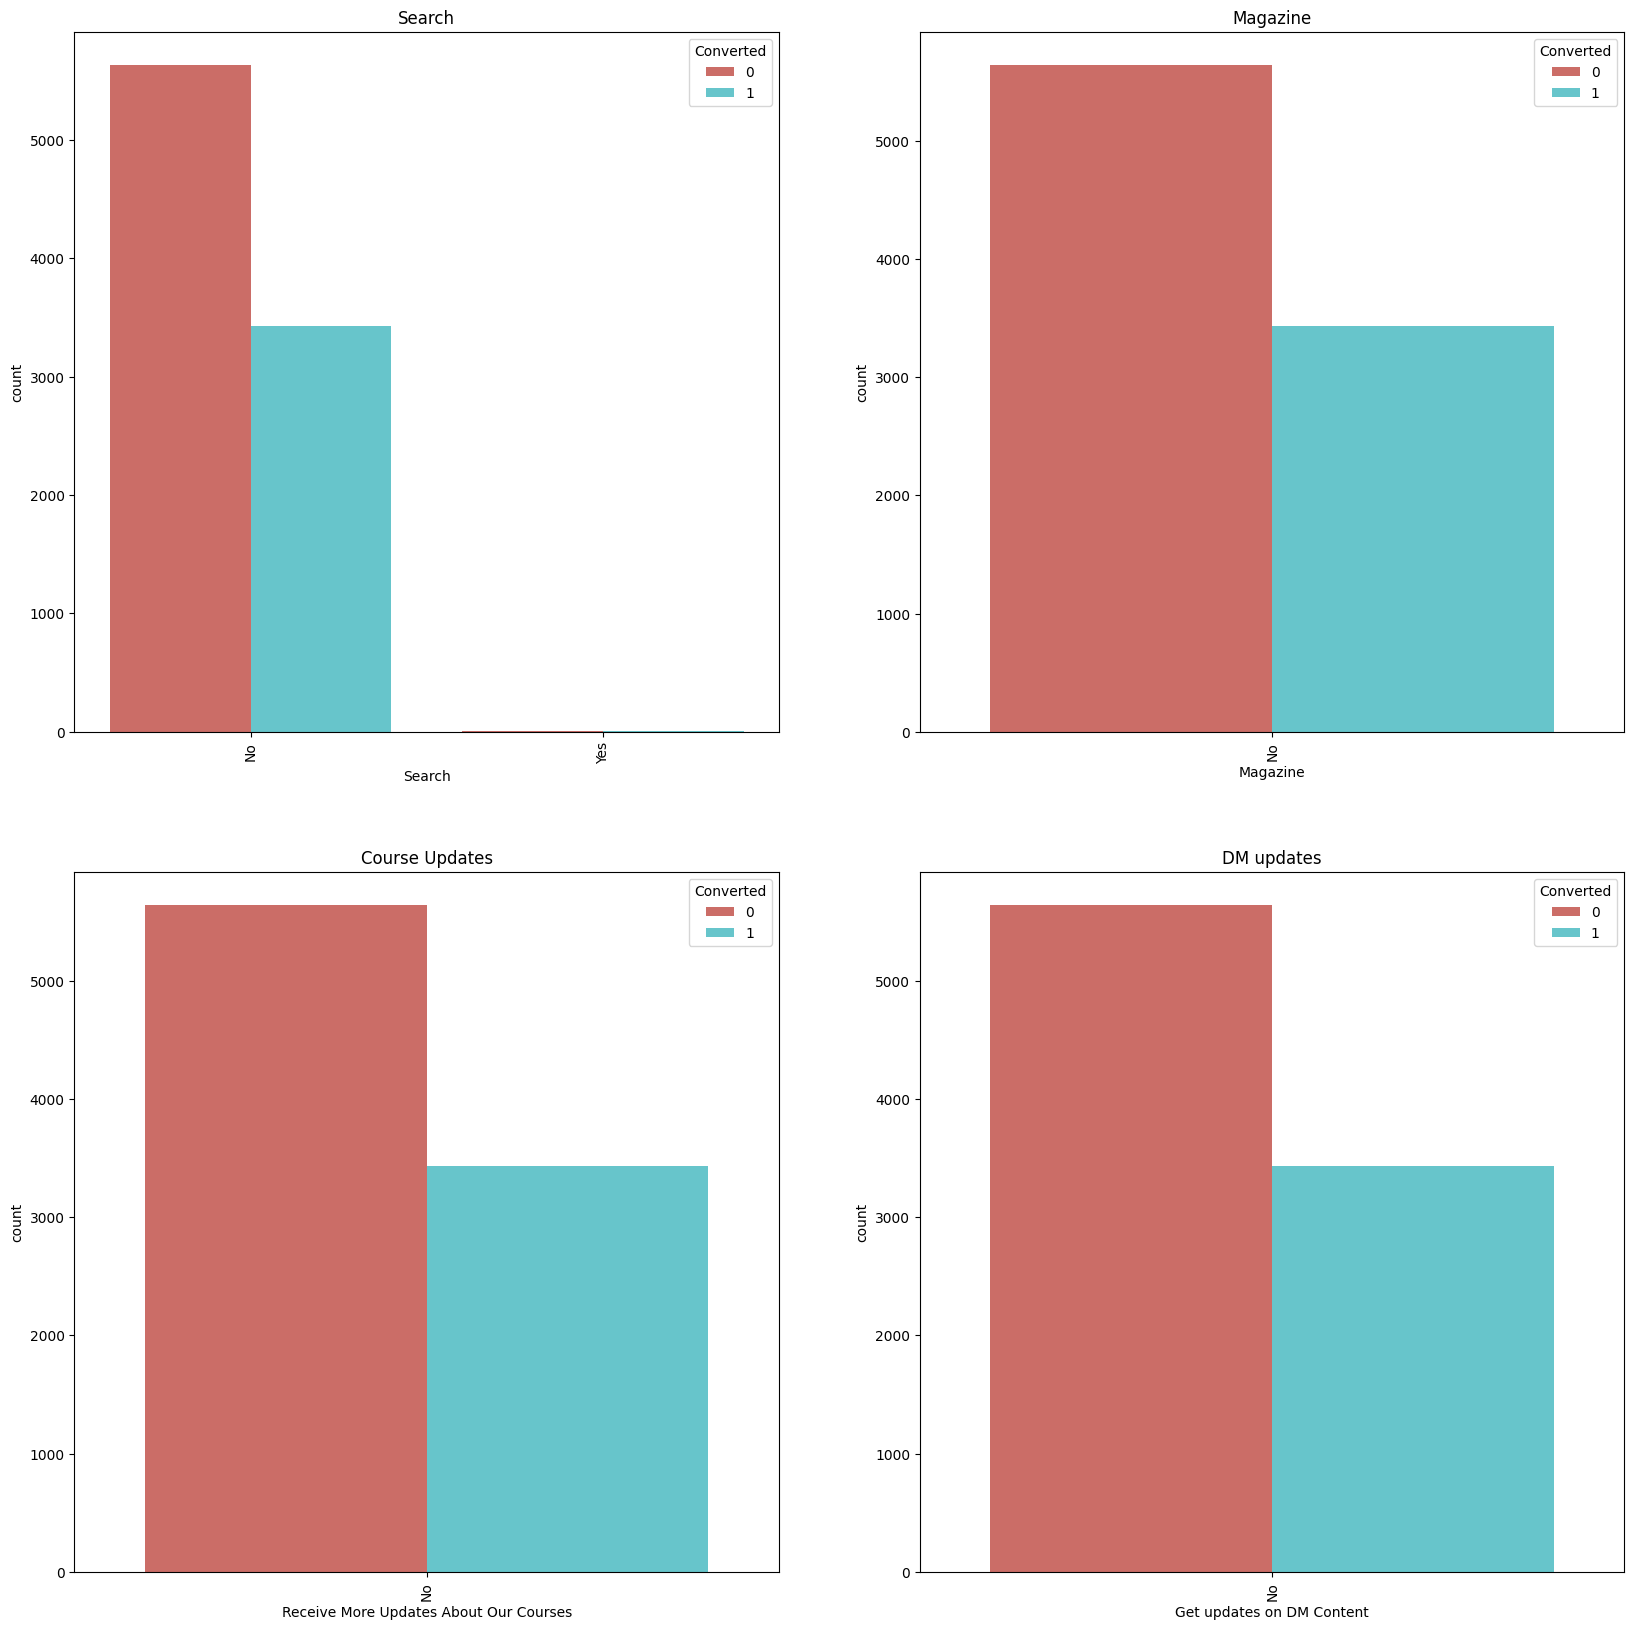

In [294]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = 'Search', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Search')

plt.subplot(2,2,2)
sns.countplot(x = 'Magazine', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Magazine')

plt.subplot(2,2,3)
sns.countplot(x = 'Receive More Updates About Our Courses', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Course Updates')

plt.subplot(2,2,4)
sns.countplot(x = 'Get updates on DM Content', data = lead, hue = 'Converted', palette = 'hls')
plt.xticks(rotation = 90)
plt.title('DM updates')

plt.show()

#### 2.1.2. Numerical Variables

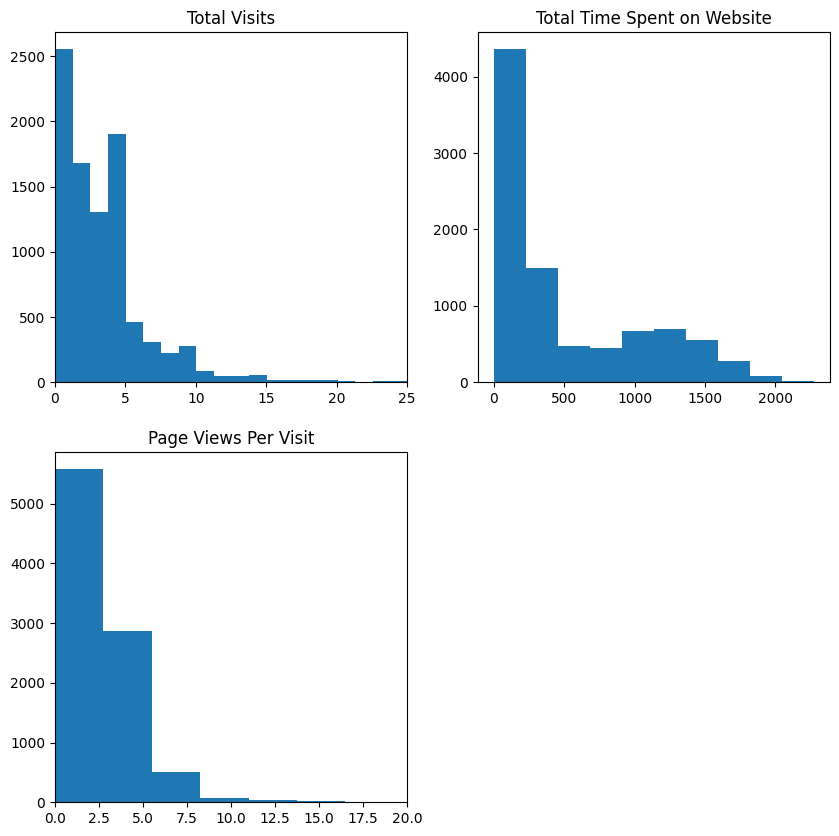

In [295]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

##### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [296]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis = 1)

In [297]:
lead.shape

(9074, 14)

In [298]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

## 3. Creating Dummy Variables

In [299]:
print(lead['Do Not Email'].value_counts())
print(lead['Do Not Call'].value_counts())

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
Do Not Call
No     9072
Yes       2
Name: count, dtype: int64


In [300]:
#Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead[vars] = lead[vars].apply(binary_map)

In [301]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead[['Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity', 'City']], drop_first=True, dtype=int)
# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)
lead.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


##### Dropping the columns for which dummies were created

In [302]:
lead = lead.drop(['Lead Origin','Specialization' ,'Lead Source', 
                 'Last Activity', 'What is your current occupation', 'Last Notable Activity', 'City'], axis = 1)

In [303]:
lead.head(10)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0,0,2.0,71,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,af465dfc-7204-4130-9e05-33231863c4b5,0,0,0,4.0,58,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
lead.shape

(9074, 77)

## 4. Spliting the data into Train Set and Test Set

In [305]:
# Import the required library
from sklearn.model_selection import train_test_split

Defining X and y

In [306]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
# Putting the target variable in y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [308]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [309]:
y_train.head()

1289    1
3604    0
5584    0
7679    0
7563    0
Name: Converted, dtype: int64

In [310]:
y_train.values

array([1, 0, 0, ..., 0, 0, 1])

In [311]:
y_train.index

Index([1289, 3604, 5584, 7679, 7563, 7978, 7780, 7863,  838,  708,
       ...
        251, 4552, 5762, 6530, 1578, 4936, 7434, 1399, 7436, 1342],
      dtype='int64', length=6351)

## 5. Scaling
   

In [312]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1289,0,0,-0.359667,1.651059,-0.176981,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3604,0,0,-0.875066,-0.883545,-1.123845,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5584,1,0,0.671130,2.226443,1.716746,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0,0,-0.875066,-0.883545,-1.123845,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,1,0,-0.359667,2.375752,-0.176981,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 6. Model Building

In [313]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE

In [314]:
# Running RFE with 15 variables as output
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [315]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False])

In [316]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Specialization_Business Administration', False, 38),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 56),
 ('Specialization_Finance Management', False, 42),
 ('Specialization_Healthcare Management', False, 40),
 ('Specialization_Hospitality Management', False, 7),
 ('Specialization_Human Resource Management', False, 39),
 ('Specialization_IT Projects Management', False, 45),
 ('Specialization_International Business', False, 26),
 ('Specialization_Marketing Management', False, 57),
 ('Specialization_Media and Advertising', False, 25),
 ('Specialization_Operations Management', False, 43),
 ('Specialization_Others', True, 1),
 ('Specialization_Retail Manageme

In [317]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_Others', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [318]:
# Importing statsmodels
import statsmodels.api as sm

In [319]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
result = logm1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2841.2
Date:                Tue, 21 Jan 2025   Deviance:                       5682.3
Time:                        16:57:44   Pearson chi2:                 6.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3558
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4268      0.124     11.475      0.000       1.183       1.670
Do Not Email                                            -1.6965      0.170     -9.971      0.000      -2.030      -1.363
Total Time Spent on Website                              1.3387      0.064     21.070      0.000       1.214       1.463
Lead Origin_Landing Page Submission                     -1.3694      0.116    -11.813      0.000      -1.597      -1.142
Lead Origin_Lead Add Form                                2.3342      0.228     10.253      0.000       1.888       2.780
Specialization_Others                                   -1.3091      0.119    -11.013      0.000      -1.542      -1.076
Lead Source_Welingak Website                             3.3426      1.041      3.212      0.001       1.303       5.382
Last Activity_Had a Phone Conversation                   1.5814      0.699      2.262      0.024       0.211       2.952
Last Activity_Olark Chat Conversation                   -1.1046      0.191     -5.780      0.000      -1.479      -0.730
What is your current occupation_Housewife               23.2643   1.83e+04      0.001      0.999   -3.58e+04    3.58e+04
What is your current occupation_Working Professional     2.6784      0.192     13.939      0.000       2.302       3.055
Last Notable Activity_Email Link Clicked                -1.9469      0.267     -7.289      0.000      -2.470      -1.423
Last Notable Activity_Email Opened                      -1.3872      0.083    -16.649      0.000      -1.551      -1.224
Last Notable Activity_Modified                          -1.8554      0.092    -20.124      0.000      -2.036      -1.675
Last Notable Activity_Olark Chat Conversation           -1.6463      0.377     -4.367      0.000      -2.385      -0.907
Last Notable Activity_Page Visited on Website           -1.6221      0.187     -8.661      0.000      -1.989      -1.255
========================================================================================================================
"""

In [320]:
# Dropping the column 'What is your current occupation_Housewife' as its p value is very high
col1 = cols.drop('What is your current occupation_Housewife')

In [321]:
# Model-2

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.6
Date:                Tue, 21 Jan 2025   Deviance:                       5693.2
Time:                        16:57:44   Pearson chi2:                 6.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3547
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4274      0.124     11.488      0.000       1.184       1.671
Do Not Email                                            -1.6981      0.170     -9.984      0.000      -2.031      -1.365
Total Time Spent on Website                              1.3354      0.063     21.038      0.000       1.211       1.460
Lead Origin_Landing Page Submission                     -1.3673      0.116    -11.810      0.000      -1.594      -1.140
Lead Origin_Lead Add Form                                2.3385      0.228     10.277      0.000       1.893       2.784
Specialization_Others                                   -1.3124      0.119    -11.051      0.000      -1.545      -1.080
Lead Source_Welingak Website                             3.3376      1.041      3.207      0.001       1.298       5.377
Last Activity_Had a Phone Conversation                   1.5779      0.699      2.257      0.024       0.208       2.948
Last Activity_Olark Chat Conversation                   -1.1071      0.191     -5.795      0.000      -1.482      -0.733
What is your current occupation_Working Professional     2.6734      0.192     13.916      0.000       2.297       3.050
Last Notable Activity_Email Link Clicked                -1.9465      0.267     -7.287      0.000      -2.470      -1.423
Last Notable Activity_Email Opened                      -1.3820      0.083    -16.601      0.000      -1.545      -1.219
Last Notable Activity_Modified                          -1.8505      0.092    -20.092      0.000      -2.031      -1.670
Last Notable Activity_Olark Chat Conversation           -1.6409      0.377     -4.354      0.000      -2.380      -0.902
Last Notable Activity_Page Visited on Website           -1.6219      0.187     -8.662      0.000      -1.989      -1.255
========================================================================================================================
"""

In [322]:
# Dropping the column 'Last Activity_Had a Phone Conversation' as its p value is a little high (being very conservative)
col1 = col1.drop('Last Activity_Had a Phone Conversation')

In [323]:
# Model-3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm.astype(int), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.5
Date:                Tue, 21 Jan 2025   Deviance:                       5698.9
Time:                        16:57:44   Pearson chi2:                 6.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3541
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4315      0.124     11.527      0.000       1.188       1.675
Do Not Email                                            -1.7022      0.170    -10.007      0.000      -2.036      -1.369
Total Time Spent on Website                              1.3360      0.063     21.048      0.000       1.212       1.460
Lead Origin_Landing Page Submission                     -1.3650      0.116    -11.797      0.000      -1.592      -1.138
Lead Origin_Lead Add Form                                2.3394      0.227     10.286      0.000       1.894       2.785
Specialization_Others                                   -1.3112      0.119    -11.047      0.000      -1.544      -1.079
Lead Source_Welingak Website                             3.3325      1.041      3.202      0.001       1.293       5.372
Last Activity_Olark Chat Conversation                   -1.1169      0.191     -5.849      0.000      -1.491      -0.743
What is your current occupation_Working Professional     2.6715      0.192     13.912      0.000       2.295       3.048
Last Notable Activity_Email Link Clicked                -1.9521      0.267     -7.309      0.000      -2.476      -1.429
Last Notable Activity_Email Opened                      -1.3878      0.083    -16.679      0.000      -1.551      -1.225
Last Notable Activity_Modified                          -1.8458      0.092    -20.076      0.000      -2.026      -1.666
Last Notable Activity_Olark Chat Conversation           -1.6363      0.377     -4.342      0.000      -2.375      -0.898
Last Notable Activity_Page Visited on Website           -1.6277      0.187     -8.694      0.000      -1.995      -1.261
========================================================================================================================
"""

All the p-values are within range now.


In [324]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].astype(int).values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.52
10,Last Notable Activity_Modified,2.37
4,Specialization_Others,2.10
9,Last Notable Activity_Email Opened,1.88
6,Last Activity_Olark Chat Conversation,1.83
3,Lead Origin_Lead Add Form,1.45
11,Last Notable Activity_Olark Chat Conversation,1.37
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.27
0,Do Not Email,1.16


VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model.

##### Since the Pvalues and VIF values are low for all the variables, model-3 is our final model. We have 13 variables in our final model.

## 7. Making Predictions on train data using the final model (Model-3)

In [325]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(int))
y_train_pred[:10]


1289    0.503659
3604    0.181313
5584    0.738139
7679    0.138014
7563    0.307999
7978    0.807131
7780    0.210585
7863    0.987923
838     0.720295
708     0.397874
dtype: float64

In [326]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.50365931, 0.18131285, 0.7381388 , 0.13801386, 0.30799941,
       0.80713119, 0.21058502, 0.98792331, 0.72029476, 0.39787427])

In [327]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Actual_Converted':y_train.values, 'Convertion_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Actual_Converted,Convertion_prob,ID
0,1,0.503659,1289
1,0,0.181313,3604
2,0,0.738139,5584
3,0,0.138014,7679
4,0,0.307999,7563


In [328]:
# Choosing an arbitrary cut-off probability point of 0.5 to find the prediction labels.
# Creating new column 'prediction_label' with 1 if Convertion_prob > 0.5 else 0

y_train_pred_final['prediction_label'] = y_train_pred_final.Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Converted,Convertion_prob,ID,prediction_label
0,1,0.503659,1289,1
1,0,0.181313,3604,0
2,0,0.738139,5584,1
3,0,0.138014,7679,0
4,0,0.307999,7563,0


## 8. Model Evaluation (on train data)

In [329]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.prediction_label )
print(confusion)


[[3210  685]
 [ 651 1805]]


###### The confusion matrix indicates as below

In [330]:
# Predicted     not_converted    converted
# Actual
# not_converted        3667      266
# converted            1336       1080  

In [331]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.prediction_label))

Accuracy : 0.7896394268619115


In [332]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [333]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7349348534201955


In [334]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8241335044929397


In [335]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.17586649550706032


In [336]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7248995983935743


In [337]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8313908313908314


#### Precision and Recall

In [338]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.prediction_label )
confusion

array([[3210,  685],
       [ 651, 1805]])

In [339]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7248995983935743


In [340]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7349348534201955


In [341]:
#Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [342]:
print("Precision :",precision_score(y_train_pred_final.Actual_Converted , y_train_pred_final.prediction_label))

Precision : 0.7248995983935743


In [343]:
print("Recall :",recall_score(y_train_pred_final.Actual_Converted, y_train_pred_final.prediction_label))

Recall : 0.7349348534201955


In [344]:
#Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Actual_Converted, y_train_pred_final.prediction_label

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Actual_Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: prediction_label, Length: 6351, dtype: int64)

In [345]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Convertion_prob)

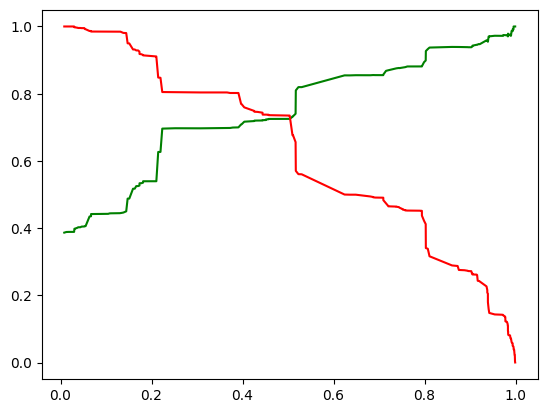

In [346]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### The above graph shows the trade-off between the Precision and Recall .

## 9. Making predictions on the test set
Scaling the test data

In [347]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [348]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Others,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8308,0,0.840787,1,0,0,0,0,0,0,0,1,0,0
7212,0,-0.878083,1,0,0,0,0,1,0,0,0,0,0
2085,0,-0.883545,0,1,1,1,0,0,0,1,0,0,0
4048,0,1.669267,1,0,0,0,0,0,0,0,0,0,0
4790,0,-0.861695,1,0,0,0,0,0,0,1,0,0,0


In [349]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm.astype(int))
y_test_pred[:10]

8308    0.144382
7212    0.939228
2085    0.987923
4048    0.802578
4790    0.210585
8552    0.390950
2232    0.104750
5259    0.510906
2399    0.104750
8018    0.067045
dtype: float64

In [350]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
8308,0.144382
7212,0.939228
2085,0.987923
4048,0.802578
4790,0.210585


In [351]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8308,0
7212,1
2085,1
4048,1
4790,0


In [352]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index
y_test_df.head()

,Converted,ID
8308,0,8308
7212,1,7212
2085,1,2085
4048,1,4048
4790,0,4790


In [353]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [354]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [355]:
y_pred_final.head()

,Converted,ID,0
0,0,8308,0.144382
1,1,7212,0.939228
2,1,2085,0.987923
3,1,4048,0.802578
4,0,4790,0.210585


In [356]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [357]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,ID,Converted_prob
0,0,8308,0.144382
1,1,7212,0.939228
2,1,2085,0.987923
3,1,4048,0.802578
4,0,4790,0.210585


In [358]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.50 else 0)
y_pred_final.head()

,Converted,ID,Converted_prob,final_predicted
0,0,8308,0.144382,0
1,1,7212,0.939228,1
2,1,2085,0.987923,1
3,1,4048,0.802578,1
4,0,4790,0.210585,0


## 10. Model Evaluation (on test data)

In [359]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7954461990451708


In [360]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1447,  297],
       [ 260,  719]])

In [361]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [362]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7344228804902962


In [363]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8297018348623854


## 11. Calculating Lead score, Identifying Hot leads and Feature Importance

### **Lead Score**

In [364]:
#Assigning Lead Score to the Testing data
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,ID,Converted_prob,final_predicted,Lead_Score
0,0,8308,0.144382,0,14
1,1,7212,0.939228,1,94
2,1,2085,0.987923,1,99
3,1,4048,0.802578,1,80
4,0,4790,0.210585,0,21


### **Hot Leads**

In [365]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,ID,Converted_prob,final_predicted,Lead_Score
1,1,7212,0.939228,1,94
2,1,2085,0.987923,1,99
17,1,8088,0.998410,1,100
18,1,3192,0.973226,1,97
20,1,2542,0.936203,1,94
...,...,...,...,...,...
2667,1,5656,0.939228,1,94
2680,1,2852,0.983275,1,98
2686,1,1642,0.937913,1,94
2690,1,6156,0.996717,1,100


In [366]:
print("The IDs of the hot leads are :")

hot_leads_ids = hot_leads["ID"].values.reshape(-1)
hot_leads_ids

The IDs of the hot leads are :


array([7212, 2085, 8088, 3192, 2542, 5664, 2734, 4216, 1368,  835, 3723,
       6933, 8229, 2722, 4677, 1408, 8592, 3725, 2489, 7840,  249, 2913,
        460,  130, 6665, 7082, 4913, 4154, 5687, 7893, 3664, 1424, 6269,
       1214, 7214, 6028, 4250, 5300, 8787, 2490, 1820, 1009, 4360, 5818,
       1416, 5049, 2984, 7469, 8085, 7167, 8461, 3652, 4218, 6760, 5937,
       5423, 7036, 8838, 8475, 8309, 6384, 5801, 6617, 1354, 8495, 3498,
       7467, 5877, 9016, 2979, 2675, 1710, 4947, 1542, 1026, 9158, 3288,
       7970, 4157, 5019,  737,  548, 1765, 6460, 7129, 2914, 1200, 3286,
       8343, 3836, 4795, 2011, 4359, 6290, 3019, 7168, 3207, 1978, 4890,
       8261, 4179, 7417, 7187, 4561, 8082, 2643, 2674, 4675, 3455, 2110,
       8396, 4525, 7641, 5695, 2378, 1767, 8867, 5206, 8801, 6792, 8268,
       8267, 5535, 3285, 6811, 7105, 7508, 8282, 7128, 6015, 3033, 3919,
       2594, 2397, 3486, 7008, 8090, 5785, 5051, 5686, 3475, 8055,  802,
       5747, 4779, 7227, 4984, 6411, 8106, 8650, 52

### **Feature Importance**

In [367]:
#Finding out the Important Features from our final model:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            3.332535
What is your current occupation_Working Professional    2.671486
Lead Origin_Lead Add Form                               2.339395
const                                                   1.431476
Total Time Spent on Website                             1.336040
Last Activity_Olark Chat Conversation                  -1.116946
Specialization_Others                                  -1.311232
Lead Origin_Landing Page Submission                    -1.365032
Last Notable Activity_Email Opened                     -1.387846
Last Notable Activity_Page Visited on Website          -1.627722
Last Notable Activity_Olark Chat Conversation          -1.636290
Do Not Email                                           -1.702207
Last Notable Activity_Modified                         -1.845806
Last Notable Activity_Email Link Clicked               -1.952129
dtype: float64

This helps us identify:
* Most impactful variables: Variables with the largest coefficients (in absolute value).
* Direction of effect:
* Positive coefficients: Increase the likelihood of the event (in our case, predicted probability).
* Negative coefficients: Decrease the likelihood of the event.

## 12. Most impactful variables i.e., Variables with the largest coefficients (in absolute value)

It was found that the variables that mattered the most in our model are (In descending order) :

* Rank 1 Lead Source_Welingak Website                              3.332535
* Rank 2 What is your current occupation_Working Professional      2.671486
* Rank 3 Lead Origin_Lead Add Form                                 2.339395
* Rank 4 Last Notable Activity_Email Link Clicked                 -1.952129
* Rank 5 Last Notable Activity_Modified                           -1.845806
* Rank 6 Do Not Email                                             -1.702207
* Rank 7 Last Notable Activity_Olark Chat Conversation            -1.636290
* Rank 8 Last Notable Activity_Page Visited on Website            -1.627722
* Rank 9 Last Notable Activity_Email Opened                       -1.387846
* Rank 10 Lead Origin_Landing Page Submission                      -1.365032
* Rank 11 Total Time Spent on Website                               1.336040
* Rank 12 Specialization_Others                                    -1.311232
* Rank 13 Last Activity_Olark Chat Conversation                    -1.116946










## 13. Recommendation:
The company should make calls to the following leads as these are more likely to get converted: 

* The leads with the lead source as "Welingak Website"  
* The leads who are "working professionals" 
* The leads with origin as 'Lead Add Form'
* The leads who spent "more time on the website" 
  
The company should NOT spend too much time on the following type of leads as these are less likely to get converted:

* The leads with last activity as "Olark Chat conversation"
* The leads whose Specialization was "Others" 
* The leads with lead origin as 'Landing page submission' 
* The leads whose last notable activity was 'Email opened'
* The leads whose last notable activity was 'Page visited on website'
* The leads with last notable activity as "Olark Chat conversation"
* The leads who chose the option of "Do not Email" as "yes" 
* The leads with last notable activity as "Modified"
* The leads with last notable activity as "Email link clicked" 
 
  

-----------------------------------------------------------------------------------------------------------------------------

Submitted on 21-01-2025 by:
* Radhika Mahajan
* Aqib Jallal
* Aishwarya Girhare
